In [8]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math

ESP = 10e-6

# My numbers 

In [2]:
a_1 = 16
a_2 = 18
a_3 = 13

b_1 = 20
b_2 = 10
b_3 = 14

c_1 = 15
c_2 = 10
c_3 = 12

## TASK 1
$$\int_0^2 y'^2 + a_1 y'y + b_1 y^2 + c_1 y e^{2t} dt$$
$$y(0) = - b_2, y(2) = b_3 $$

In [3]:
num_of_fractions = 51  # по условленности
t = np.linspace(0, 2, num_of_fractions)    
dt = t[1] - t[0]    # шаг

In [203]:
((t[1:-1] - t[0:-2]) / dt).shape

(49,)

In [209]:
((t[1:] - t[:-1]) / dt)

(50,)

In [211]:
((t[1:] - t[:-1]) / dt) - t

ValueError: operands could not be broadcast together with shapes (50,) (51,) 

In [213]:
#функционал 
def f(y):
    # Дискретная назад смотрящая первая производная 
    dy = (y[1:] - y[:-1]) / dt
    y_ = y[1:]
    t2 = 2 * t  
    return np.sum(dy ** 2 + (a_1 * dy * y_) + b_1 * (y_ ** 2) + c_1 * y_  * np.exp(t2))

f(t)

ValueError: operands could not be broadcast together with shapes (50,) (51,) 

In [177]:
print(np.exp(2 * t), len(np.exp(2 * t)))

[ 1.          1.08328707  1.17351087  1.27124915  1.37712776  1.4918247
  1.6160744   1.7506725   1.89648088  2.05443321  2.22554093  2.41089971
  2.61169647  2.82921701  3.0648542   3.32011692  3.59663973  3.8961933
  4.22069582  4.5722252   4.95303242  5.36555597  5.81243739  6.29653826
  6.82095847  7.3890561   8.00446891  8.67113766  9.39333129 10.17567431
 11.02317638 11.94126442 12.93581732 14.01320361 15.18032224 16.44464677
 17.81427318 19.29797176 20.90524324 22.64637964 24.5325302  26.5757727
 28.78919088 31.18695817 33.78442846 36.59823444 39.64639407 42.94842598
 46.52547444 50.40044478 54.59815003] 51


In [181]:
print((t[1:] - t[:-1]) / dt, len((t[1:] - t[:-1]) / dt))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 50


In [ ]:
#функционал 
def f(y):
    # Дискретная назад смотрящая первая производная 
    dy = ((y[1:] - y[:-1]) / dt)
    y_ = y[1:]
    t2 = 2 * t  
    #return np.sum(dy ** 2 + (a_1 * dy * y_) + b_1 * (y_ ** 2)  + c_1 * y_  * np.exp(t2))
    return np.sum(dy ** 2 + (a_1 * dy * y_) + b_1 * (y_ ** 2)  + c_1 * y_  * np.exp(t2))

f(t)

In [160]:
f(t)

ValueError: operands could not be broadcast together with shapes (50,) (51,) 

In [150]:
y0 = [0.2 for x in range(0, num_of_fractions)]   # Начальное значение y
# Задаем ограничения на y. У нас y(0)=b_2 и y(2)=b_3
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (b_2 - ESP, b_2 + ESP), (b_3 - ESP, b_3 + ESP)

In [151]:
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)
res.x

ValueError: operands could not be broadcast together with shapes (50,) (51,) 

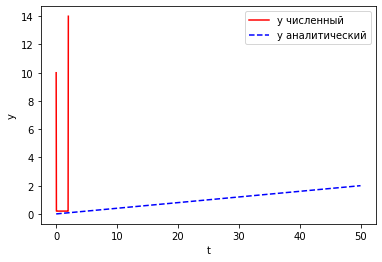

In [146]:
# Построим график и убедимся, что численное и аналитическое решения совпали
plt.plot(t, res.x, 'r', t,  '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()